In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'


import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


In [2]:
#loading the datasets

pg_data=pd.read_csv('PG_survey.csv')
medic_data=pd.read_csv('medic_survey.csv')

In [3]:
#create a dataset with just the text data

text_df=pd.DataFrame(pd.concat([pg_data['stress or anxiety levels factors'],medic_data['What things make you stressed']],axis=0),columns=['text'])
text_df

,text
0,Being away from home as an international student
1,lack of holiday
2,The death of a friend. Loss of extracurricular...
3,NaN
4,NaN
...,...
156,"Residency applications/interviews, Finances, S..."
157,"Exams, Having no money, Deadlines for projects"
158,"Exams, Being behind on study, Procrastination"
159,"Exams, Career, General life stresses"


In [4]:
text_df.dropna(inplace=True)
text_df.isna().sum()

text    0
dtype: int64

In [5]:
pg_text=pg_data['stress or anxiety levels factors'].dropna()
pg_text.isna().sum()

0

In [6]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 160
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    300 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


In [9]:
#convert text to tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
documents = pg_text.values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 12
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

pg_text['cluster'] = model.labels_

pg_text.head()


0     Being away from home as an international student
1                                      lack of holiday
2    The death of a friend. Loss of extracurricular...
5    Not having enough time to go home and see family 
7    Relationships, death in the family, pressure t...
Name: stress or anxiety levels factors, dtype: object

Text(0.5, 1.0, 'TFIDF clustering Elbow curve')

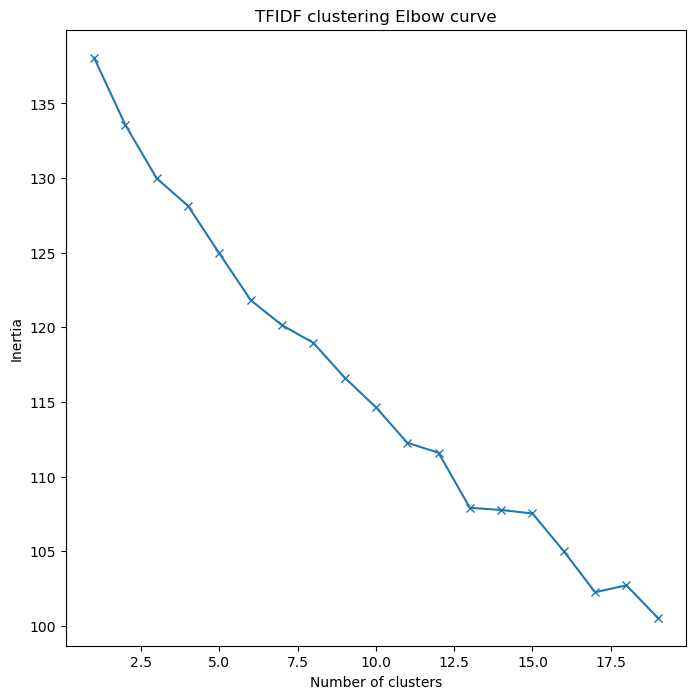

In [10]:
#testing for number of clusters by

clust_list=[]
for cluster in range(1,20):
    kmeans=KMeans(n_clusters=cluster,n_init=10)
    kmeans.fit(features)
    clust_list.append(kmeans.inertia_)
    
df_elbow=pd.DataFrame({'Cluster':range(1,20),'cluster_list':clust_list})

#plotting the elbow curve

plt.figure(figsize=(8,8))
plt.plot(df_elbow['Cluster'],df_elbow['cluster_list'],marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('TFIDF clustering Elbow curve') 

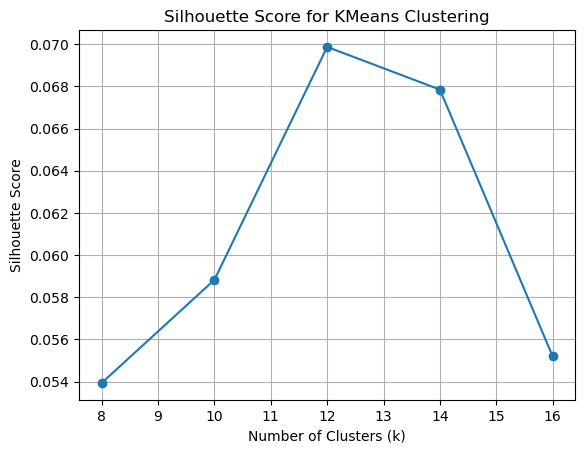

In [11]:
#getting the silhouette scores based on the ideal range of clusters from the elbow curve

range_n_clusters = [8,10,12,14,16]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans_sh = KMeans(n_clusters=num_clusters,n_init=10)
    #kmeans_sh.fit(pg_scaled)
    cluster_labels=kmeans_sh.fit_predict(features)
    #silhouette score
    silhouette_avg.append(silhouette_score(features, cluster_labels))
    


#df_elbow=pd.DataFrame({'Cluster':range(1,20),'cluster_list':clust_list})
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.grid(True)
plt.show()


In [12]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :5]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 research
 enjoy
 realisation
 anymore
 careers
------------
Cluster 1:
 moving
 flat
 house
 break
 contract
------------
Cluster 2:
 personal
 issues
 grandparents
 injury
 family
------------
Cluster 3:
 issues
 family
 dissertation
 job
 bad
------------
Cluster 4:
 time
 having
 commuting
 stressful
 working
------------
Cluster 5:
 health
 wedding
 physical
 organising
 sinus
------------
Cluster 6:
 relationship
 break
 long
 breakdown
 term
------------
Cluster 7:
 illness
 problems
 general
 life
 phd
------------
Cluster 8:
 thesis
 stress
 writing
 university
 deadlines
------------
Cluster 9:
 family
 illness
 away
 home
 friends
------------
Cluster 10:
 work
 extra
 uni
 issues
 caffeine
------------
Cluster 11:
 relationships
 familial
 death
 pressure
 visit
------------


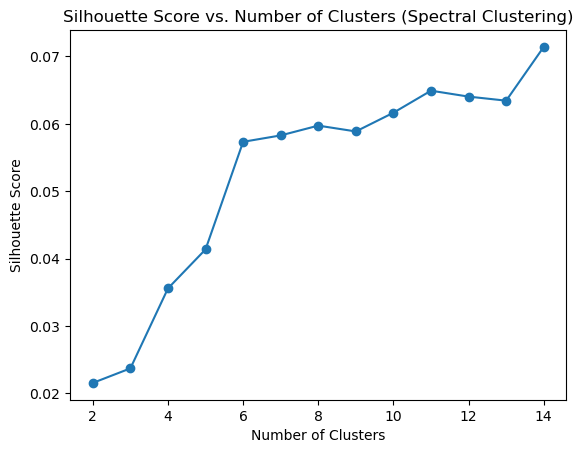

In [54]:

#getting the silhouette scores based on the ideal range of clusters from the elbow curve

cluster_range = range(2, 15)
silhouette_scores = []
for n_clusters in cluster_range:
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = spectral_clustering.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores against the number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Spectral Clustering)')
plt.show()

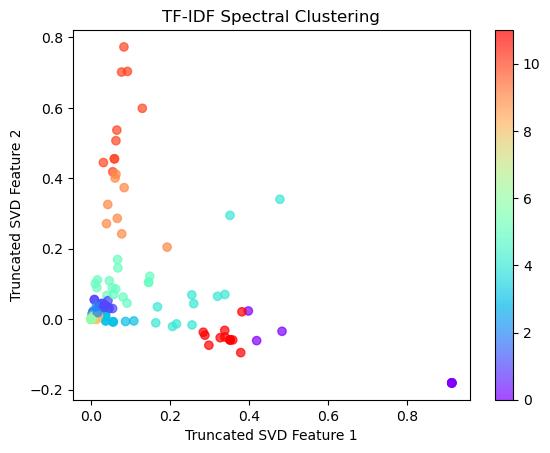

In [47]:
#spectral clustering 

#reduce feature to two dimensions using 


# Assuming you have the 'features' matrix and 'sc_clustering' object already defined

# Reduce features to two dimensions using TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_features = svd.fit_transform(features)


#initialise the spectral estimator
sc=SpectralClustering(n_clusters=12,affinity='nearest_neighbors',random_state=0)
sc_clustering=sc.fit(svd_features)

# Create a scatter plot
plt.scatter(svd_features[:, 0], svd_features[:, 1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, marker='o')
plt.title("TF-IDF Spectral Clustering")
plt.xlabel("Truncated SVD Feature 1")
plt.ylabel("Truncated SVD Feature 2")
plt.colorbar()
plt.show()


# pg_text.head()

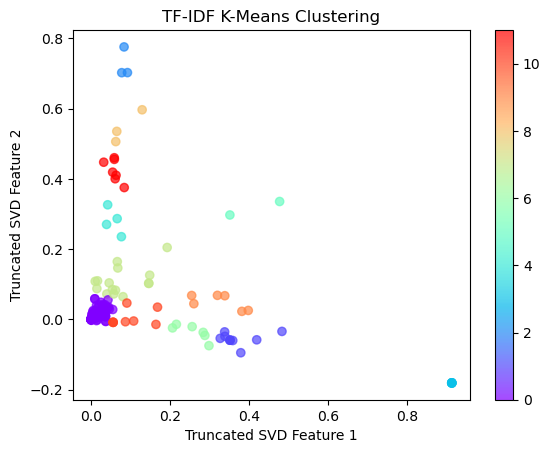

In [25]:
k = 12
k_model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
k_labels=k_model.fit_predict(svd_features)

# Create a scatter plot
plt.scatter(svd_features[:, 0], svd_features[:, 1], c=k_labels, cmap='rainbow', alpha=0.7, marker='o')
plt.title("TF-IDF K-Means Clustering")
plt.xlabel("Truncated SVD Feature 1")
plt.ylabel("Truncated SVD Feature 2")
plt.colorbar()
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from nltk.corpus import stopwords



In [ ]:
stopwords=set(STOPWORDS)

text_data = " ".join(text_df['text'])
wc = WordCloud(background_color='white',
     stopwords = stopwords, width = 800, height = 500).generate(text_data)

plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
#text_m=medic_data['What things make you stressed'].dropna()
text_p=pg_data['stress or anxiety levels factors'].dropna()

In [ ]:
text_m = " ".join(text_m)
wc = WordCloud(background_color='white',
     stopwords = stopwords, width = 800, height = 500).generate(text_m)

plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
text_p = " ".join(text_p)
wc = WordCloud(background_color='white',
     stopwords = stopwords, width = 800, height = 500).generate(text_p)

plt.axis('off')
plt.imshow(wc)
plt.show()

### Word2Vec embeddings for clustering

In [31]:
#loading libraries 

from nltk.corpus import stopwords
from gensim.models import Word2Vec
import re

stop = set(stopwords.words("english"))

In [32]:
#this function removes special characters that are not text
def preprocess(text):
    text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text)) 
    output = re.sub(r'\d+', '', text_input)#remove numerical characters
    return output.lower().strip() #convert to lowercase


def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)
    
    
pg_data['preprocessed_text'] = pg_data['stress or anxiety levels factors'].map(preprocess)
pg_data['preprocessed_text'] = pg_data.preprocessed_text.map(remove_stopwords)

In [33]:
pg_data['preprocessed_text'].dropna(inplace=True)

In [34]:
def build_corpus(data):
    corpus = []
    for sentence in pg_data['preprocessed_text'].items():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(pg_data['preprocessed_text'])

In [35]:
w2c_model = Word2Vec(corpus, vector_size=100, min_count=1)

Text(0.5, 1.0, 'Word2Vec clustering Elbow curve')

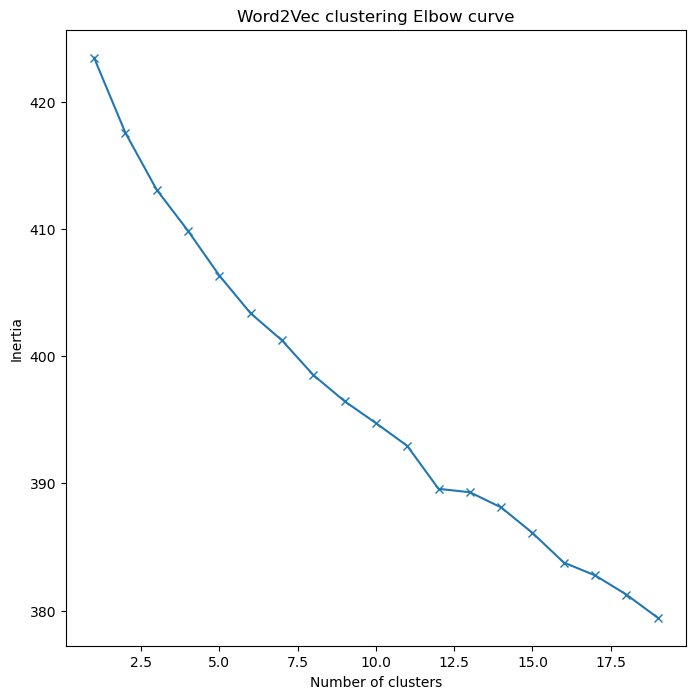

In [38]:
from sklearn.preprocessing import normalize

normalized_vectors = w2c_model.wv.get_normed_vectors()

#testing for number of clusters by

w2v_clusters=[]
for cluster in range(1,20):
    kmeans=KMeans(n_clusters=cluster,n_init=10)
    kmeans.fit(normalized_vectors)
    w2v_clusters.append(kmeans.inertia_)
    
w2v_elbow=pd.DataFrame({'Cluster':range(1,20),'cluster_list':w2v_clusters})

#plotting the elbow curve

plt.figure(figsize=(8,8))
plt.plot(w2v_elbow['Cluster'],w2v_elbow['cluster_list'],marker='x')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Word2Vec /k-Means clustering Elbow curve') 

In [39]:
print("Cluster centroids: \n")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
K=12
for i in range(K):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 balance
 away
 commute
 caffeine
 comes
 deadline
 different
 close
 difficulties
 disrespectful
------------
Cluster 1:
 breakdown
 dissertation
 ahead
 downs
 coming
 attempting
 eating
 1st
 boyfriend
 ability
------------
Cluster 2:
 collapse
 apartment
 choosing
 buying
 break
 critically
 deteriorating
 ability
 appointments
 1st
------------
Cluster 3:
 climate
 critically
 distance
 deadline
 body
 ahead
 drinking
 arguments
 anymore
 days
------------
Cluster 4:
 attempting
 balance
 american
 body
 diffculities
 diagnosed
 caffeine
 absence
 come
 concentration
------------
Cluster 5:
 completion
 careers
 dealine
 different
 appointments
 diffculities
 condition
 coming
 activities
 balancing
------------
Cluster 6:
 careers
 employee
 deciding
 bad
 critically
 child
 conditions
 difficulty
 caffeine
 coupled
------------
Cluster 7:
 deadline
 dissertation
 big
 ability
 city
 contract
 depression
 deciding
 anxiety
 difficulties
-----------

C:\Users\kimb3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kimb3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kimb3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kimb3\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

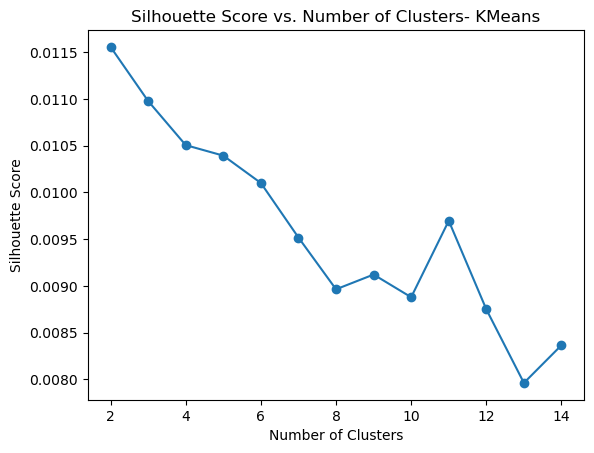

In [62]:

# Initialize lists to store silhouette scores for each cluster number
sh1_scores = []

# Loop through different cluster numbers
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    Kcluster_labels = kmeans.fit_predict(normalized_vectors)
    silhouette_avgK = silhouette_score(normalized_vectors, Kcluster_labels)
    sh1_scores.append(silhouette_avgK)

# Plot the silhouette scores against the number of clusters
plt.plot(cluster_range, sh1_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters- KMeans')
plt.show()


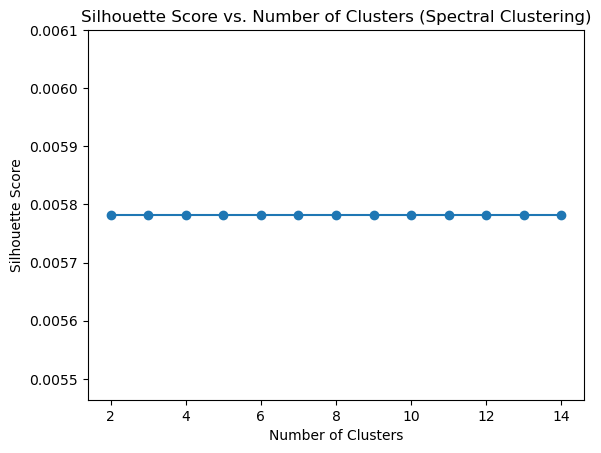

In [59]:
#grid search for spectral clustering with w2v
sh_scores=[]
for n_clusters in cluster_range:
    spectral_clusteringW = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    clustersW= spectral_clustering.fit_predict(normalized_vectors)
    silhouette_avgW = silhouette_score(normalized_vectors, clustersW)
    sh_scores.append(silhouette_avgW)
    
plt.plot(cluster_range, sh_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (Spectral Clustering)')
plt.show()

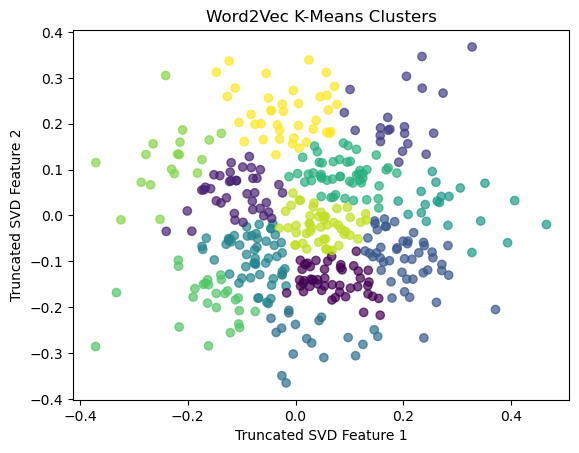

In [49]:
#truncated svd clustering with word2vec

svd2 = TruncatedSVD(n_components=2)
svd2_features = svd.fit_transform(normalized_vectors)

k = 12
W_k_model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
W_k_labels=k_model.fit_predict(svd2_features)


# Create a scatter plot
plt.scatter(svd2_features[:, 0], svd2_features[:, 1], c=W_k_labels,alpha=0.7, marker='o')
plt.title("Word2Vec K-Means Clusters")
plt.xlabel("Truncated SVD Feature 1")
plt.ylabel("Truncated SVD Feature 2")
plt.show()

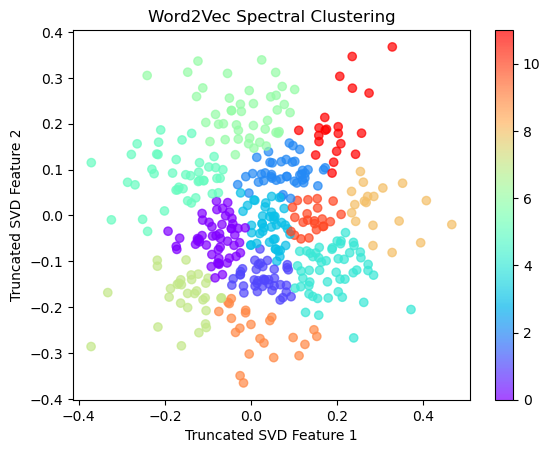

In [50]:
#initialise the spectral estimator
W_sc=SpectralClustering(n_clusters=12,affinity='nearest_neighbors',random_state=0)

#initialise the spectral estimator
W_sc=SpectralClustering(n_clusters=12,affinity='nearest_neighbors',random_state=0)
W_sc_clustering=sc.fit(svd2_features)

# Create a scatter plot
plt.scatter(svd2_features[:, 0], svd2_features[:, 1], c=W_sc_clustering.labels_, cmap='rainbow', alpha=0.7, marker='o')
plt.title("Word2Vec Spectral Clustering")
plt.xlabel("Truncated SVD Feature 1")
plt.ylabel("Truncated SVD Feature 2")
plt.colorbar()
plt.show()

In [ ]:
#optimisation using grid search

